# Problem 1

3.2.4 Problem 1: Data Exploration
You should do some exploratory data analysis and show your understanding of this dataset. You can start from basic
statistical information, such as num Imps, num Clicks, Cost, CTR, avg CPM, eCPC. You can also include further analysis
on user feedback, bidding etc. A good example can be found in the paper [1].


## SETUP

In [175]:
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import sys
sys.path.append("../Code/")
from utils import *
from graphs import *
from scipy.sparse import csr_matrix

## DATA LOAD

In [176]:
# data directory
DATA_DIR = os.path.join('..', 'Data')
# load data
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
validation = pd.read_csv(os.path.join(DATA_DIR, 'validation.csv'))

### Basic Statistics

In [177]:
performance_statistics(train)

               CTR: (0.0738)%
        num_clicks: 1793
             spend: 189984608 (100.00)%
              aCPM: 78.15141623895867
              aCPC: 105.0
num_in_budget_wins: 2430981
 ads_within_budget: 2430981
  avg_market_price: 78.15141623895867
   num_advertisers: 9
     avg_bid_price: 272.9620461862927


In [178]:
performance_statistics(validation)

               CTR: (0.0665)%
        num_clicks: 202
             spend: 23777270 (100.00)%
              aCPM: 78.23400509994242
              aCPC: 117.0
num_in_budget_wins: 303925
 ads_within_budget: 303925
  avg_market_price: 78.23400509994242
   num_advertisers: 9
     avg_bid_price: 273.0530986263058


In [179]:
performance_statistics(train, 6250*1000)

               CTR: (0.0703)%
        num_clicks: 56
             spend: 6249728 (100.00)%
              aCPM: 78.49543450683882
              aCPC: 111.0
num_in_budget_wins: 79619
 ads_within_budget: 79619
  avg_market_price: 2.570866658357264
   num_advertisers: 9
     avg_bid_price: 8.936231916251094


In [107]:
performance_statistics(validation, 6250*1000)

               CTR: (0.0640)%
        num_clicks: 51
             spend: 6249819 (100.00)%
              aCPM: 78.41975231188125
              aCPC: 122.0
num_in_budget_wins: 79697
 ads_within_budget: 79697
  avg_market_price: 20.563688409969565
   num_advertisers: 9
     avg_bid_price: 71.60144443530476


Avg Bid prices and market prices have decreased when applying the budget
Validation and training data are split correctly as they have similar values
By adding a budget we only get through (%) of the impressions
9 different advertisers 
2430981 impressions in training dataset with 1793 clicks
303925 impressions in validation dataset with 202 clicks
By applying our budget - training and validation set get similar amount of clicks - may be based on the ordering of impressions

In [122]:
pd.options.display.max_columns = None
train.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,trqRTvKaXTKfgg24JKTI,6447a7dfa30fe6eb410c91860e7c9b45,null,2015392487,200,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,20fc675468712705dbf5d3eda94126da,3ddf173a94bd23c326683b6373c75dd4,null,mm_10982364_973726_8930541,300,250,FourthView,Na,0,10722,294,23,null,2821,null
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,trqRTJn7O95I1mKYUV,625d1b5916ea925332c7b326c0574cfa,null,1720123646,250,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,5F97t5E0BTK7XhNrUMpENpn,dedc488b98ca20707bc9a723957e7d1f,null,mm_10027070_118039_10308280,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,13625cb070ffb306b425cd803c4b7ab4,4199d1227c511fc776b76594dabff9f8,null,1120200150,728,90,OtherView,Na,133,7330,277,133,null,2259,null


In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430981 entries, 0 to 2430980
Data columns (total 25 columns):
click             int64
weekday           int64
hour              int64
bidid             object
userid            object
useragent         object
IP                object
region            int64
city              int64
adexchange        object
domain            object
url               object
urlid             object
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    object
slotformat        object
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           object
dtypes: int64(11), object(14)
memory usage: 463.7+ MB


In [121]:
train.T.apply(lambda x: x.nunique(), axis=1)

click                   2
weekday                 7
hour                   24
bidid             2430981
userid            2342677
useragent              38
IP                 503975
region                 35
city                  370
adexchange              5
domain              23013
url                763961
urlid                   1
slotid              52283
slotwidth              21
slotheight             14
slotvisibility         11
slotformat              4
slotprice             286
creative              131
bidprice                8
payprice              301
keypage                19
advertiser              9
usertag            744036
dtype: int64

#### User Tag

According to the table above there are 744036 unique combinations, however, it does not tell us much information about the different user tags. Below we extract the information -> tell us that there are actually only 69 unique tags + null. The Most number of tags in one impression is .....
You can see the frequency of user tag size
Distribution of Tags

In [159]:
a = train.groupby('userid').count()['click']

In [160]:
b = train.groupby('userid')['click'].sum()

In [161]:
x = pd.DataFrame({'impressions': a, 'clicks': b})






In [165]:
x = x.sort_values(by=['impressions', 'clicks'], ascending=False)

In [170]:
x = x[x['impressions'] > 1]

In [172]:
x  = x.sort_values(by='clicks', ascending=False)

In [180]:
x[x['clicks'] > 0].head()

,clicks,impressions
userid,,
2f3a2ee59188b6ebb53c98e2ffed485b16a7c4c3,2,2
05882afa283f90567b8d28e1c15e8bab3a972eb7,2,8
ccbf4729046206fe199eccd383231dad61a083b8,2,2
f949dec02b7b46211d04b22ba8bc8f5e86e3ad46,1,4
9d389864c2dca3af782fd159550b9fbd1ea0e965,1,2


In [181]:
x[x['clicks'] > 0].sort_values(by='clicks', ascending=False).head()

,clicks,impressions
userid,,
2f3a2ee59188b6ebb53c98e2ffed485b16a7c4c3,2,2
ccbf4729046206fe199eccd383231dad61a083b8,2,2
05882afa283f90567b8d28e1c15e8bab3a972eb7,2,8
268833efddc30b06ad020f8109055324d9b133ff,1,2
2e666ca86cedb5b1f67cb23dcc18b3c616afd9cb,1,2


In [151]:
train.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,trqRTvKaXTKfgg24JKTI,6447a7dfa30fe6eb410c91860e7c9b45,null,2015392487,200,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,[null]
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,20fc675468712705dbf5d3eda94126da,3ddf173a94bd23c326683b6373c75dd4,null,mm_10982364_973726_8930541,300,250,FourthView,Na,0,10722,294,23,null,2821,[null]
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,trqRTJn7O95I1mKYUV,625d1b5916ea925332c7b326c0574cfa,null,1720123646,250,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"[10052, 10006, 13866, 10110]"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,5F97t5E0BTK7XhNrUMpENpn,dedc488b98ca20707bc9a723957e7d1f,null,mm_10027070_118039_10308280,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"[13866, 10063, 10111]"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,13625cb070ffb306b425cd803c4b7ab4,4199d1227c511fc776b76594dabff9f8,null,1120200150,728,90,OtherView,Na,133,7330,277,133,null,2259,[null]


In [160]:
train['usertag'] = train['usertag'].str.split(',')

In [161]:
a = [i for its in train['usertag'] for i in its]

In [162]:
vals = pd.value_counts(a)

In [163]:
vals.shape[0]

69

In [164]:
vals.head()

10063    1450953
10006    1373077
10110     997100
10083     572511
10024     537312
dtype: int64

In [44]:
ut_max_len = np.max([len(i) for i in ut_list])
ut_max_len

48

#### User agents

User agents - Actually broser and os concatenated - explore the data as separate columns 

In [6]:
train = split_useragent(train) if 'useragent' in train.columns else train

In [8]:
train.head()

,click,weekday,hour,bidid,userid,IP,region,city,adexchange,domain,...,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,os,browser
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,125.37.175.*,2,2,2,trqRTvKaXTKfgg24JKTI,...,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null,windows,ie
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,171.36.92.*,238,239,1,20fc675468712705dbf5d3eda94126da,...,Na,0,10722,294,23,null,2821,null,windows,chrome
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,59.46.106.*,40,41,2,trqRTJn7O95I1mKYUV,...,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,ie
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,114.250.226.*,1,1,1,5F97t5E0BTK7XhNrUMpENpn,...,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,183.63.192.*,216,233,2,13625cb070ffb306b425cd803c4b7ab4,...,Na,133,7330,277,133,null,2259,null,windows,ie


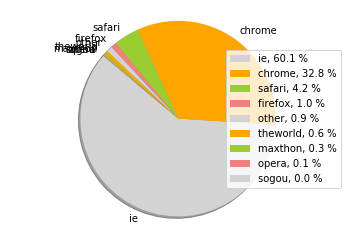

,browser,count
0,ie,1461700
1,chrome,797992
2,safari,101122
3,firefox,23391
4,other,22482
5,theworld,14025
6,maxthon,7485
7,opera,2753
8,sogou,31


In [10]:
plot_pie_chart(train, 'browser')

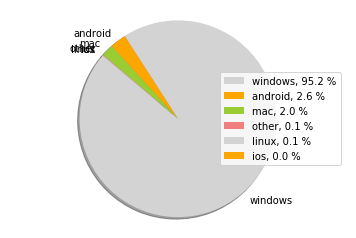

,os,count
0,windows,2314896
1,android,64359
2,mac,47938
3,other,1833
4,linux,1565
5,ios,390


In [11]:
plot_pie_chart(train, 'os')

### Slot Area 

In [14]:
train = join_height_width(train) if 'slotarea' not in train.columns else train

In [16]:
pd.options.display.max_columns = None
train.head()

,click,weekday,hour,bidid,userid,IP,region,city,adexchange,domain,url,urlid,slotid,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,os,browser,slotarea
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,125.37.175.*,2,2,2,trqRTvKaXTKfgg24JKTI,6447a7dfa30fe6eb410c91860e7c9b45,null,2015392487,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null,windows,ie,40000
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,171.36.92.*,238,239,1,20fc675468712705dbf5d3eda94126da,3ddf173a94bd23c326683b6373c75dd4,null,mm_10982364_973726_8930541,FourthView,Na,0,10722,294,23,null,2821,null,windows,chrome,75000
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,59.46.106.*,40,41,2,trqRTJn7O95I1mKYUV,625d1b5916ea925332c7b326c0574cfa,null,1720123646,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,ie,62500
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,114.250.226.*,1,1,1,5F97t5E0BTK7XhNrUMpENpn,dedc488b98ca20707bc9a723957e7d1f,null,mm_10027070_118039_10308280,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie,96000
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,183.63.192.*,216,233,2,13625cb070ffb306b425cd803c4b7ab4,4199d1227c511fc776b76594dabff9f8,null,1120200150,OtherView,Na,133,7330,277,133,null,2259,null,windows,ie,65520


In [17]:
train.T.apply(lambda x: x.nunique(), axis=1)

click                   2
weekday                 7
hour                   24
bidid             2430981
userid            2342677
IP                 503975
region                 35
city                  370
adexchange              5
domain              23013
url                763961
urlid                   1
slotid              52283
slotvisibility         11
slotformat              4
slotprice             286
creative              131
bidprice                8
payprice              301
keypage                19
advertiser              9
usertag            744036
os                      6
browser                 9
slotarea               26
dtype: int64

### Distribution of Prices

In [177]:
train['payprice'].quantile([0.1, 0.25, 0.50, 0.75, 0.9, 1.0], interpolation='nearest')

0.10     18
0.25     33
0.50     68
0.75     99
0.90    168
1.00    300
Name: payprice, dtype: int64

In [24]:
np.median(validation['payprice'])

68.0

In [183]:
np.max(train['bidprice'])

300

In [171]:
train['bidprice'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 1.0])

0.10    238.0
0.25    241.0
0.50    294.0
0.75    300.0
0.90    300.0
1.00    300.0
Name: bidprice, dtype: float64

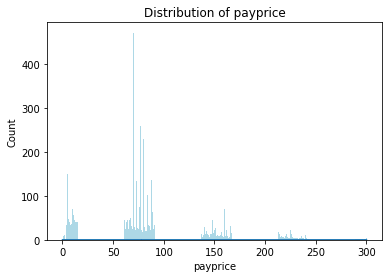

In [8]:

x = np.linspace(0,300,50)

import numpy as np
import scipy.stats as stats
plt.plot(x, stats.norm.pdf(x,61,59))
plt.show()

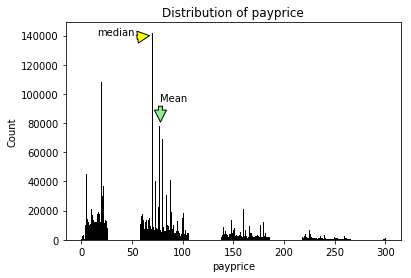

In [63]:
width = 0.6
dist = dist_table(train, 'payprice')
plt.bar(dist['payprice'], dist['count'],width, color="black")
plt.ylabel('Count')
plt.xlabel('payprice')
plt.title('Distribution of ' + 'payprice')
plt.annotate('Mean', xy=(78, 80000), xytext=(78, 95000),
            arrowprops=dict(facecolor='lightgreen', shrink=0.05),
            )
plt.annotate('median', xy=(68, 140000), xytext=(15, 140000),
            arrowprops=dict(facecolor='yellow', shrink=0.05),
            )
plt.show()

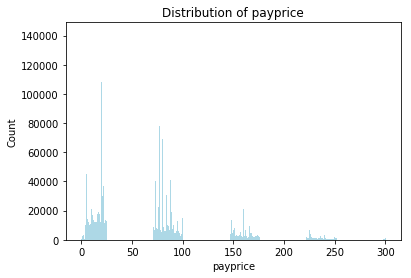

In [34]:
plot_price_distribution(train, 'payprice')

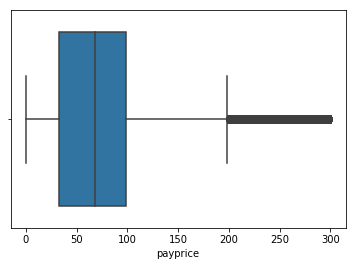

In [6]:
import seaborn as sns 
sns.boxplot(train['payprice'])
plt.show()

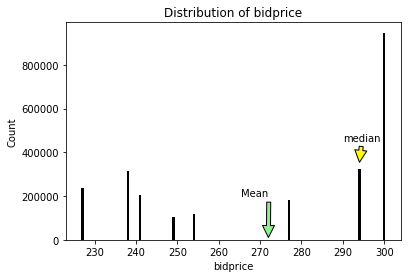

In [97]:
width = 0.6
dist = dist_table(train, 'bidprice')
plt.bar(dist['bidprice'], dist['count'],width, color="black")
plt.ylabel('Count')
plt.xlabel('bidprice')
plt.title('Distribution of ' + 'bidprice')
plt.annotate('Mean', xy=(272, 1000), xytext=(265.5, 200000),
            arrowprops=dict(facecolor='lightgreen', shrink=0.05),
            )
plt.annotate('median', xy=(294, 350000), xytext=(290, 450000),
            arrowprops=dict(facecolor='yellow', shrink=0.05),
            )
plt.show()

In [96]:
pd.options.display.max_rows = 999    

In [97]:
## preparing summary tables 
advertiser_summary = analysis_table(train, 'advertiser')
weekday_summary = analysis_table(train, 'weekday')
hour_summary = analysis_table(train, 'hour')
adexchange_summary = analysis_table(train, 'adexchange')
weekday_hour_summary = analysis_table(train, ['weekday', 'hour'])
region_summary = analysis_table(train, 'region')
city_summary = analysis_table(train, 'city')
region_city_summary = analysis_table(train, ['region', 'city'])
browser_summary = analysis_table(train, 'browser')
os_summary = analysis_table(train, 'os')
slotarea_summary = analysis_table(train, 'slotarea')

In [140]:
region_summary 

,region,impressions,wins,clicks,CTR,spend,CPM,eCPC,avgPayPrice,avgBidPrice,priceDiff
0,0,51788,51788.0,43,0.083031,3783.884,73.064880,87.997302,73.064880,276.495327,203.430447
1,1,102388,102388.0,84,0.082041,7964.554,77.787963,94.816119,77.787963,272.657499,194.869535
2,2,37695,37695.0,29,0.076933,2949.367,78.242923,101.702310,78.242923,271.759331,193.516408
3,3,108509,108509.0,84,0.077413,8491.229,78.253684,101.086060,78.253684,273.320674,195.066990
4,15,63055,63055.0,70,0.111014,4960.935,78.676314,70.870500,78.676314,272.985600,194.309286
5,27,31322,31322.0,25,0.079816,2455.446,78.393653,98.217840,78.393653,273.293691,194.900038
6,40,81358,81358.0,42,0.051624,6243.528,76.741414,148.655429,76.741414,273.107783,196.366368
7,55,47810,47810.0,28,0.058565,3616.721,75.647793,129.168607,75.647793,273.621565,197.973771
8,65,51431,51431.0,38,0.073885,4033.539,78.426222,106.145763,78.426222,273.330540,194.904318
9,79,63513,63513.0,41,0.064554,5585.092,87.936202,136.221756,87.936202,269.974808,182.038606


### Impressions Exploration

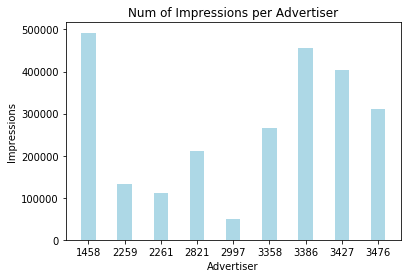

In [117]:
plot_bar_graph(advertiser_summary, 'advertiser', 'impressions', 'Advertiser', 'Impressions', 'Num of impressions per Advertiser')

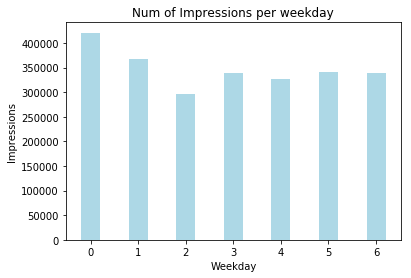

In [118]:
plot_bar_graph(weekday_summary, 'weekday', 'impressions', 'Weekday', 'Impressions', 'Num of impressions per weekday')

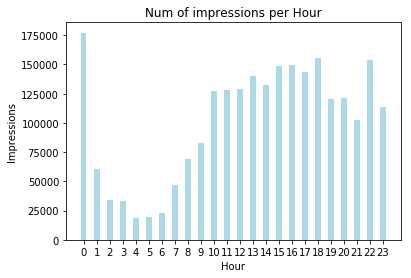

In [119]:
plot_bar_graph(hour_summary, 'hour', 'impressions', 'Hour', 'Impressions', 'Num of impressions per Hour')

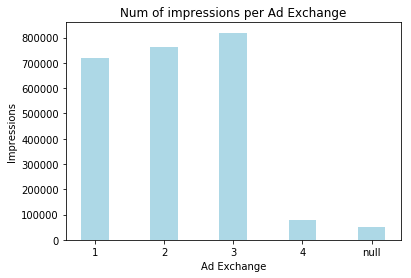

In [120]:
plot_bar_graph(adexchange_summary, 'adexchange', 'impressions', 'Ad Exchange', 'Impressions', 'Num of impressions per Ad Exchange')

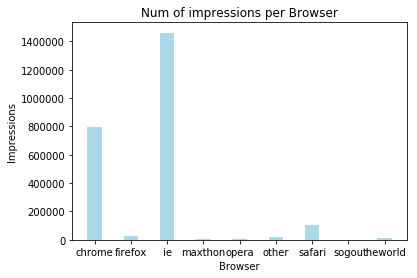

In [121]:
plot_bar_graph(browser_summary, 'browser', 'impressions', 'Browser', 'Impressions', 'Num of impressions per Browser')

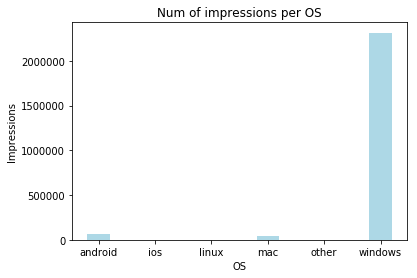

In [122]:
plot_bar_graph(os_summary, 'os', 'impressions', 'OS', 'Impressions', 'Num of impressions per OS')

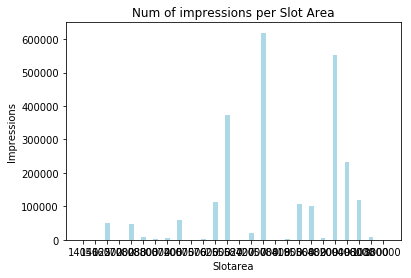

In [123]:
plot_bar_graph(slotarea_summary, 'slotarea', 'impressions', 'Slotarea', 'Impressions', 'Num of impressions per Slot Area')

### Clicks Exploration

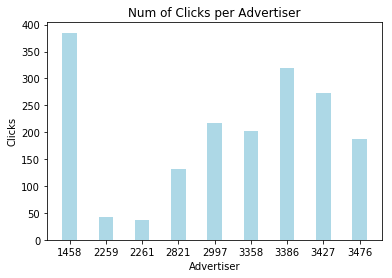

In [101]:
plot_bar_graph(advertiser_summary, 'advertiser', 'clicks', 'Advertiser', 'Clicks', 'Num of Clicks per Advertiser')

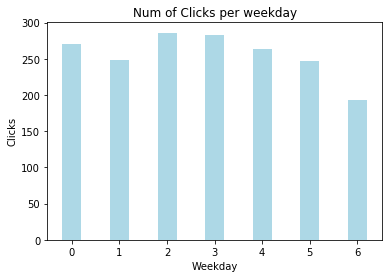

In [102]:
plot_bar_graph(weekday_summary, 'weekday', 'clicks', 'Weekday', 'Clicks', 'Num of Clicks per weekday')

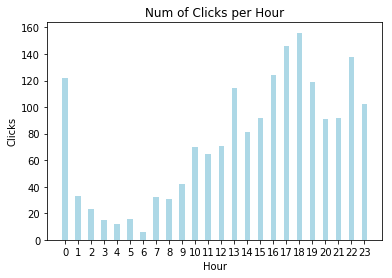

In [103]:
plot_bar_graph(hour_summary, 'hour', 'clicks', 'Hour', 'Clicks', 'Num of Clicks per Hour')

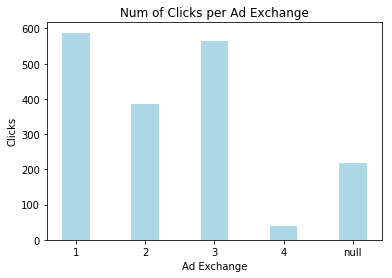

In [104]:
plot_bar_graph(adexchange_summary, 'adexchange', 'clicks', 'Ad Exchange', 'Clicks', 'Num of Clicks per Ad Exchange')

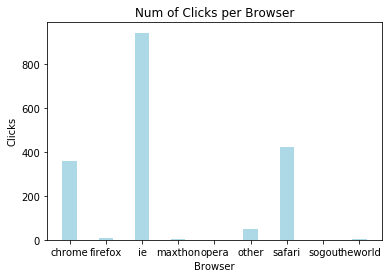

In [105]:
plot_bar_graph(browser_summary, 'browser', 'clicks', 'Browser', 'Clicks', 'Num of Clicks per Browser')

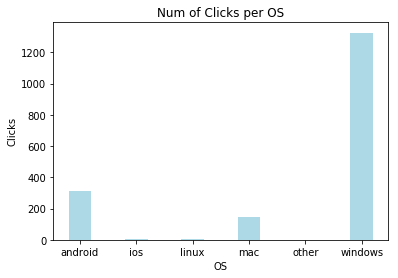

In [106]:
plot_bar_graph(os_summary, 'os', 'clicks', 'OS', 'Clicks', 'Num of Clicks per OS')

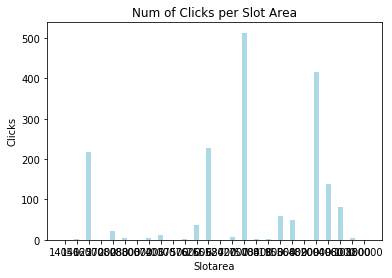

In [108]:
plot_bar_graph(slotarea_summary, 'slotarea', 'clicks', 'Slotarea', 'Clicks', 'Num of Clicks per Slot Area')

### CTR Exploration

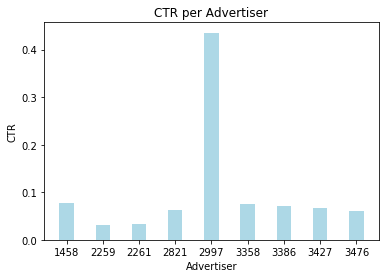

In [110]:
plot_bar_graph(advertiser_summary, 'advertiser', 'CTR', 'Advertiser', 'CTR', 'CTR per Advertiser')

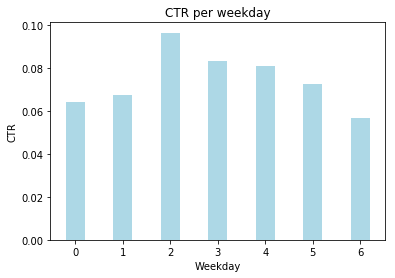

In [111]:
plot_bar_graph(weekday_summary, 'weekday', 'CTR', 'Weekday', 'CTR', 'CTR per weekday')

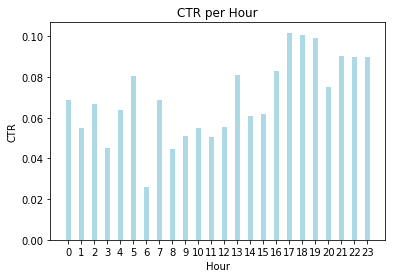

In [112]:
plot_bar_graph(hour_summary, 'hour', 'CTR', 'Hour', 'CTR', 'CTR per Hour')

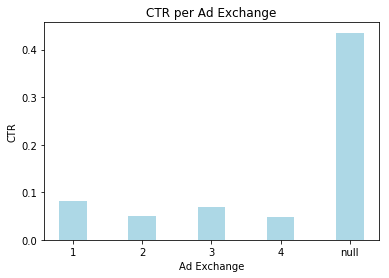

In [113]:
plot_bar_graph(adexchange_summary, 'adexchange', 'CTR', 'Ad Exchange', 'CTR', 'CTR per Ad Exchange')

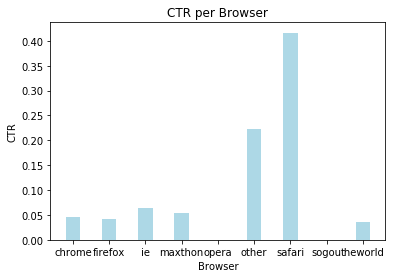

In [114]:
plot_bar_graph(browser_summary, 'browser', 'CTR', 'Browser', 'CTR', 'CTR per Browser')

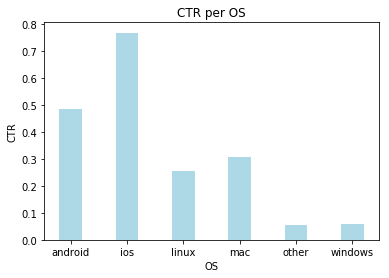

In [115]:
plot_bar_graph(os_summary, 'os', 'CTR', 'OS', 'CTR', 'CTR per OS')

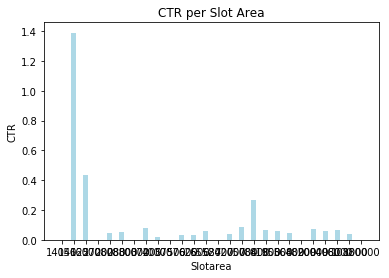

In [116]:
plot_bar_graph(slotarea_summary, 'slotarea', 'CTR', 'Slotarea', 'CTR', 'CTR per Slot Area')

### Pay Price Exploration

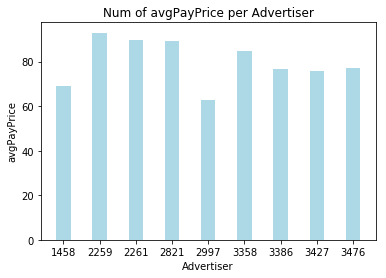

In [125]:
plot_bar_graph(advertiser_summary, 'advertiser', 'avgPayPrice', 'Advertiser', 'avgPayPrice', 'AvgPayPrice per Advertiser')

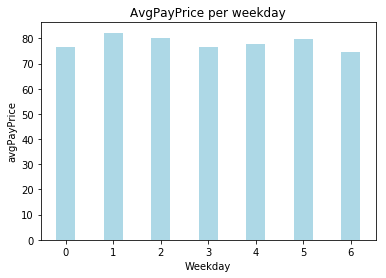

In [128]:
plot_bar_graph(weekday_summary, 'weekday', 'avgPayPrice', 'Weekday', 'avgPayPrice', 'AvgPayPrice per weekday')

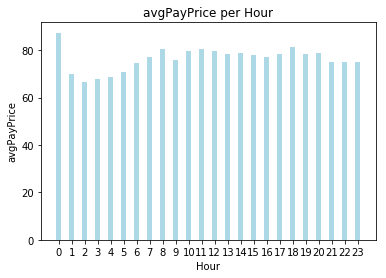

In [129]:
plot_bar_graph(hour_summary, 'hour', 'avgPayPrice', 'Hour', 'avgPayPrice', 'avgPayPrice per Hour')

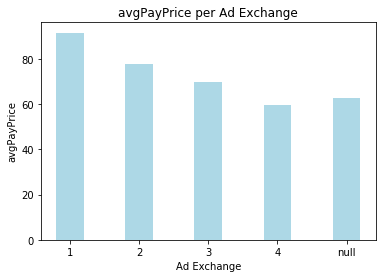

In [130]:
plot_bar_graph(adexchange_summary, 'adexchange', 'avgPayPrice', 'Ad Exchange', 'avgPayPrice', 'avgPayPrice per Ad Exchange')

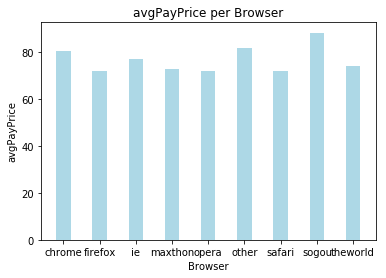

In [131]:
plot_bar_graph(browser_summary, 'browser', 'avgPayPrice', 'Browser', 'avgPayPrice', 'avgPayPrice per Browser')

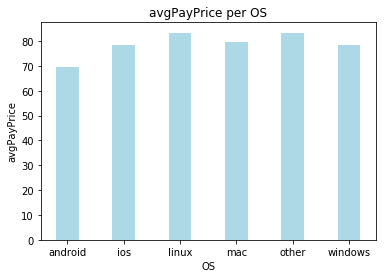

In [132]:
plot_bar_graph(os_summary, 'os', 'avgPayPrice', 'OS', 'avgPayPrice', 'avgPayPrice per OS')

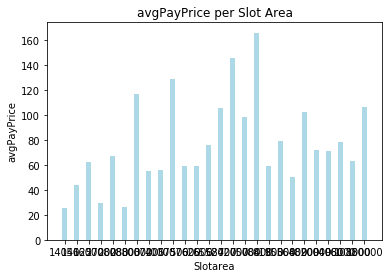

In [133]:
plot_bar_graph(slotarea_summary, 'slotarea', 'avgPayPrice', 'Slotarea', 'avgPayPrice', 'avgPayPrice per Slot Area')

### eCPC Exploration

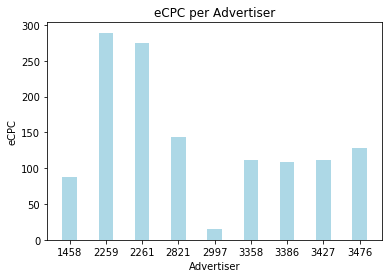

In [139]:
plot_bar_graph(advertiser_summary, 'advertiser', 'eCPC', 'Advertiser', 'eCPC', 'eCPC per Advertiser')

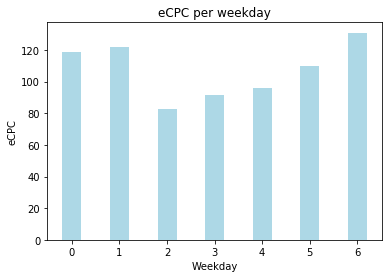

In [138]:
plot_bar_graph(weekday_summary, 'weekday', 'eCPC', 'Weekday', 'eCPC', 'eCPC per weekday')

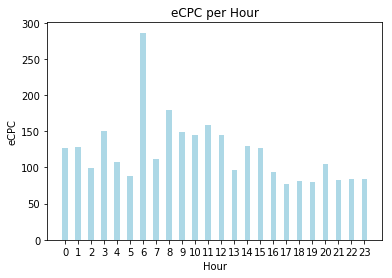

In [137]:
plot_bar_graph(hour_summary, 'hour', 'eCPC', 'Hour', 'eCPC', 'eCPC per Hour')

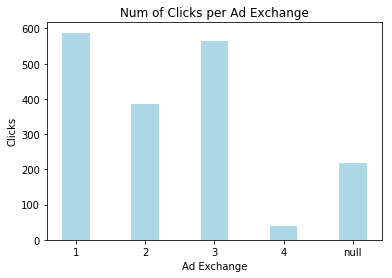

In [104]:
plot_bar_graph(adexchange_summary, 'adexchange', 'eCPC', 'Ad Exchange', 'eCPC', 'eCPC per Ad Exchange')

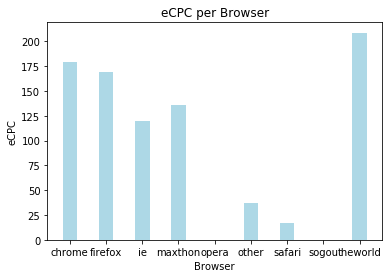

In [136]:
plot_bar_graph(browser_summary, 'browser', 'eCPC', 'Browser', 'eCPC', 'eCPC per Browser')

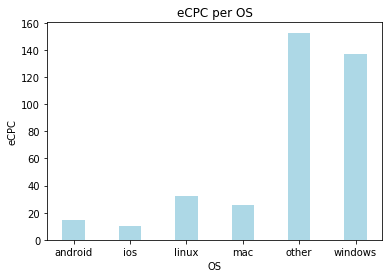

In [135]:
plot_bar_graph(os_summary, 'os', 'eCPC', 'OS', 'eCPC', 'eCPC per OS')

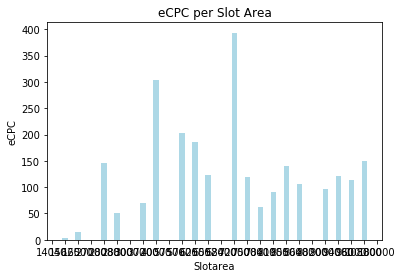

In [134]:
plot_bar_graph(slotarea_summary, 'slotarea', 'eCPC', 'Slotarea', 'eCPC', 'eCPC per Slot Area')

### Regions & Cities

In [142]:
region_summary.sort_values(by=['clicks','CTR'], ascending=False)

,region,impressions,wins,clicks,CTR,spend,CPM,eCPC,avgPayPrice,avgBidPrice,priceDiff
19,216,407378,407378.0,235,0.057686,33331.740,81.820177,141.837191,81.820177,276.302756,194.482579
15,146,160464,160464.0,124,0.077276,12417.088,77.382391,100.137806,77.382391,273.016184,195.633793
10,80,184018,184018.0,122,0.066298,14089.431,76.565504,115.487139,76.565504,271.157691,194.592187
11,94,133932,133932.0,97,0.072425,10790.151,80.564398,111.238670,80.564398,272.540976,191.976578
1,1,102388,102388.0,84,0.082041,7964.554,77.787963,94.816119,77.787963,272.657499,194.869535
3,3,108509,108509.0,84,0.077413,8491.229,78.253684,101.086060,78.253684,273.320674,195.066990
23,276,125494,125494.0,84,0.066935,8795.528,70.087239,104.708667,70.087239,271.351196,201.263957
16,164,108104,108104.0,83,0.076778,8649.815,80.013829,104.214639,80.013829,272.552690,192.538861
13,124,72528,72528.0,73,0.100651,5619.442,77.479622,76.978658,77.479622,271.829238,194.349617
18,201,64421,64421.0,71,0.110213,5092.758,79.054315,71.728986,79.054315,272.297434,193.243119


In [143]:
city_summary.sort_values(by=['clicks','CTR'], ascending=False)

,city,impressions,wins,clicks,CTR,spend,CPM,eCPC,avgPayPrice,avgBidPrice,priceDiff
1,1,102388,102388.0,84,0.082041,7964.554,77.787963,94.816119,77.787963,272.657499,194.869535
213,219,109078,109078.0,56,0.051339,8754.547,80.259512,156.331196,80.259512,275.941143,195.681631
211,217,94951,94951.0,53,0.055818,7626.031,80.315436,143.887377,80.315436,275.471011,195.155575
0,0,51788,51788.0,43,0.083031,3783.884,73.064880,87.997302,73.064880,276.495327,203.430447
78,79,63513,63513.0,41,0.064554,5585.092,87.936202,136.221756,87.936202,269.974808,182.038606
250,275,53440,53440.0,34,0.063623,3939.103,73.710760,115.855971,73.710760,270.610629,196.899869
196,202,20059,20059.0,33,0.164515,1551.861,77.364824,47.026091,77.364824,272.967546,195.602722
252,277,49003,49003.0,33,0.067343,3508.464,71.596923,106.317091,71.596923,271.133053,199.536130
94,95,31589,31589.0,29,0.091804,2693.561,85.268954,92.881414,85.268954,272.481592,187.212637
2,2,37695,37695.0,29,0.076933,2949.367,78.242923,101.702310,78.242923,271.759331,193.516408


In [144]:
region_city_summary.sort_values(by=['clicks','CTR'], ascending=False)

,region,city,impressions,wins,clicks,CTR,spend,CPM,eCPC,avgPayPrice,avgBidPrice,priceDiff
1,1,1,102388,102388.0,84,0.082041,7964.554,77.787963,94.816119,77.787963,272.657499,194.869535
215,216,219,109078,109078.0,56,0.051339,8754.547,80.259512,156.331196,80.259512,275.941143,195.681631
213,216,217,94951,94951.0,53,0.055818,7626.031,80.315436,143.887377,80.315436,275.471011,195.155575
0,0,0,51788,51788.0,43,0.083031,3783.884,73.064880,87.997302,73.064880,276.495327,203.430447
78,79,79,63513,63513.0,41,0.064554,5585.092,87.936202,136.221756,87.936202,269.974808,182.038606
253,275,275,53440,53440.0,34,0.063623,3939.103,73.710760,115.855971,73.710760,270.610629,196.899869
198,201,202,20059,20059.0,33,0.164515,1551.861,77.364824,47.026091,77.364824,272.967546,195.602722
255,276,277,49003,49003.0,33,0.067343,3508.464,71.596923,106.317091,71.596923,271.133053,199.536130
94,94,95,31589,31589.0,29,0.091804,2693.561,85.268954,92.881414,85.268954,272.481592,187.212637
2,2,2,37695,37695.0,29,0.076933,2949.367,78.242923,101.702310,78.242923,271.759331,193.516408


### User Tags

In [153]:
tags_win = [i for its in train[train['click'] == 1]['usertag'] for i in its]

In [154]:
tag_wins_count = pd.value_counts(tags_win)

In [156]:
tag_wins_count.head()

10063    828
10006    738
10110    586
null     503
10111    433
dtype: int64

In [14]:
hour_summary = analysis_table(validation, 'hour')

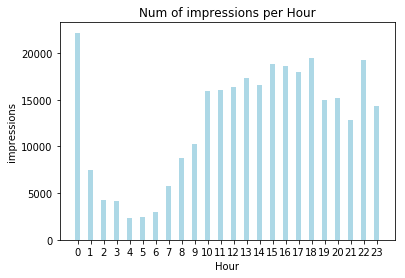

In [15]:
plot_bar_graph(hour_summary, 'hour', 'impressions', 'Hour', 'impressions', 'Num of impressions per Hour')